# Research Skills: Image Analysis 
## Take-home Assignment - Part 1 
Sharon Ong, Department of Cognitive Science and Artificial Intelligence 

Tilburg University
Blok 3, Spring 2024

Your First Name: Daniel

Your Last Name: Koltai

Your Student ID: 2123303

Please include any special instructions to run your code, references to any code, methods, ideas that are not your own or not provided in this course here. 

**Note** <br>
To set up the specific environment in which the notebook solutions were prodecud I attached the file environment.yml <br>
This file contains the dependencies to recreate the same environment (with conda) for running the notebook

## 1A: RGB to HSV and back again

1. (3 points) Read in the color image you have been provided. Display the image with an appropriate title.

Text(0.5, 1.0, 'Color Image')

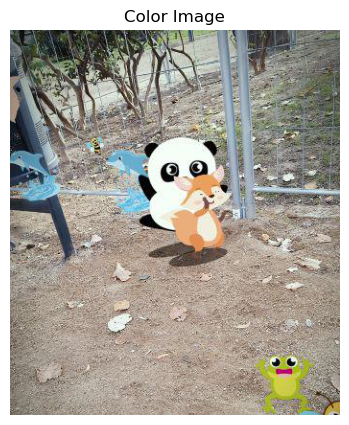

In [1]:
from skimage import io
from matplotlib import pyplot as plt

imc = io.imread("files/2123303.zip/2123303_rgbimage.jpg")
plt.figure(figsize=(5,5))
plt.imshow(imc)
plt.axis('off')
plt.title('Color Image')

2. (4 points) Convert the image to HSV. Separate the Hue, Saturation and Value channels. Display the 
three channels separately in three subplots and corresponding intensity histograms.

Text(0.5, 0.98, 'HSV channel plots and histograms of colour image')

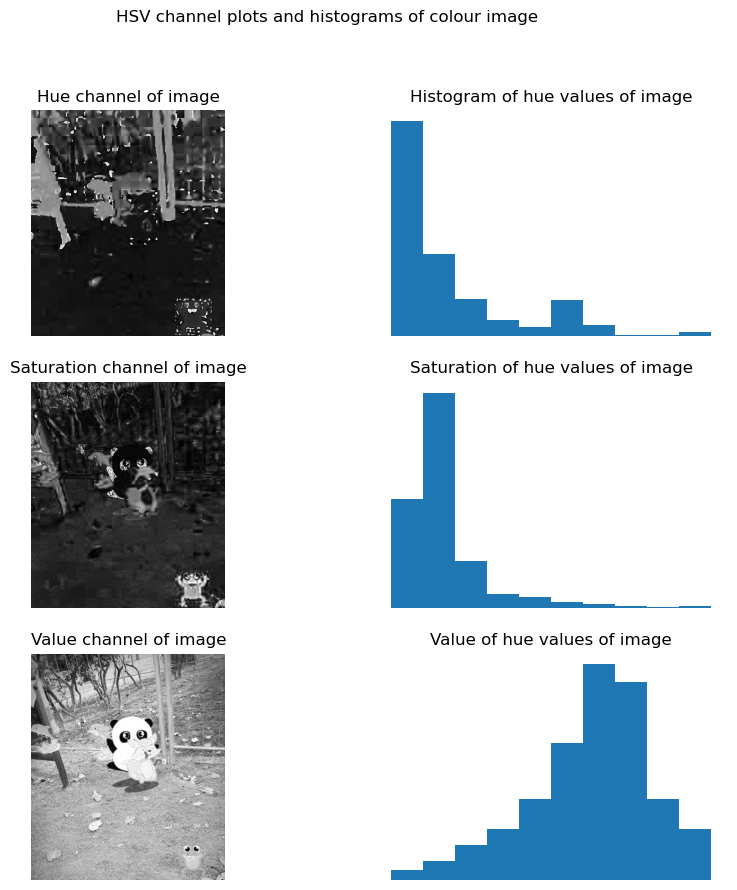

In [2]:
from skimage import color

imc_hsv = color.rgb2hsv(imc)

hue_channel = imc_hsv[:,:,0]
saturation_channel = imc_hsv[:,:,1]
value_channel = imc_hsv[:,:,2]

plt.figure(figsize=(10,10))
plt.subplot(321)
plt.imshow(hue_channel, cmap='gray')
plt.axis('off')
plt.title('Hue channel of image')
plt.subplot(322)
plt.hist(hue_channel.flatten(), bins = 10)
plt.axis('off')
plt.title('Histogram of hue values of image')
plt.subplot(323)
plt.imshow(saturation_channel, cmap='gray')
plt.axis('off')
plt.title('Saturation channel of image')
plt.subplot(324)
plt.hist(saturation_channel.flatten(), bins = 10)
plt.axis('off')
plt.title('Saturation of hue values of image')
plt.subplot(325)
plt.imshow(value_channel, cmap='gray')
plt.axis('off')
plt.title('Value channel of image')
plt.subplot(326)
plt.hist(value_channel.flatten(), bins = 10)
plt.axis('off')
plt.title('Value of hue values of image')
plt.suptitle('HSV channel plots and histograms of colour image')

3. (4 points) Perform a histogram equalization on the Hue channel. Display the output Hue channel (as a 
grayscale image) and its corresponding intensity histogram.

Text(0.5, 0.98, 'Hue channel histogram equalisation of color image')

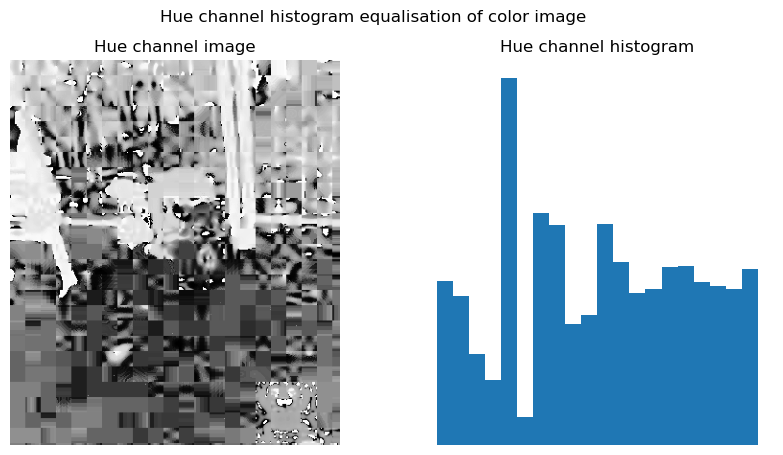

In [3]:
from skimage import exposure

imc_hsv_histeq = exposure.equalize_hist(hue_channel)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(imc_hsv_histeq, cmap = 'gray')
plt.axis('off')
plt.title('Hue channel image')
plt.subplot(122)
plt.hist(imc_hsv_histeq.flatten(), bins = 20)
plt.axis('off')
plt.title('Hue channel histogram')
plt.suptitle('Hue channel histogram equalisation of color image')

4. (5 points) Create a new HSV array with the modi
ed Hue channel (with the resulting channel from 
Question 3 with the original saturation and original value channels. Convert the new HSV image t 
RGB. Display the orignal RGB (fromuestion  Q1 and the converted RGB image in a subplot.

Text(0.5, 0.98, 'Colour image before and after hue channel histogram equalization')

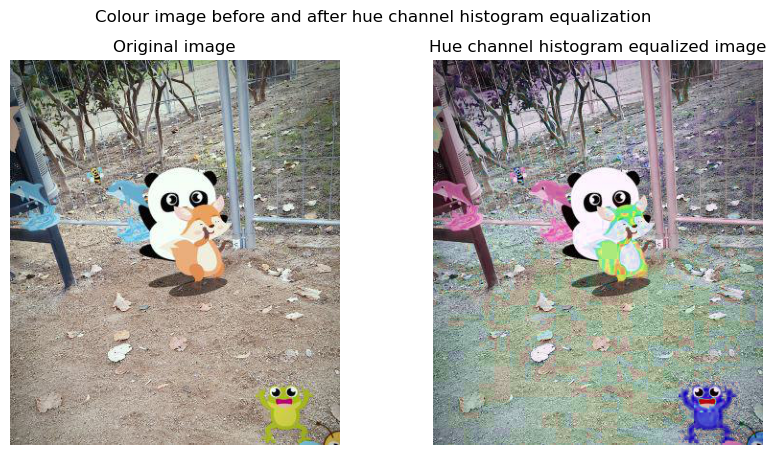

In [4]:
# substitute the hue channel of the original image with the histogram equalized hue channel
imc_hsv[:,:,0] = imc_hsv_histeq

imc_new_hue = color.hsv2rgb(imc_hsv)

# display original image and new image
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(imc)
plt.axis('off')
plt.title('Original image')
plt.subplot(122)
plt.imshow(imc_new_hue)
plt.axis('off')
plt.title('Hue channel histogram equalized image')
plt.suptitle('Colour image before and after hue channel histogram equalization')

8. (4 points) Why does intensity transformations in the hue channel change the pixel color? 

The pixel colour in HSV colour representation consist of H - hue, S - saturation, V - value. The hue values provides the original colour of a pixel, while the saturation value defines how much white paint the pixel contains, and the brightness value defines how much black paint the pixel has.

Chaning the intensity of the hue channel changes the hue value of several pixels. Pixels with different hue value appear to display different colours, given that the hue value represents the colour value of the pixel.

## 1B: Image smoothing in the spatial and frequency domain

1. (5 points) Convert the color image which you have been provided to grayscale. Display the image with 
a gray colormap and an appropriate title.

Text(0.5, 1.0, 'Colour image in grayscale')

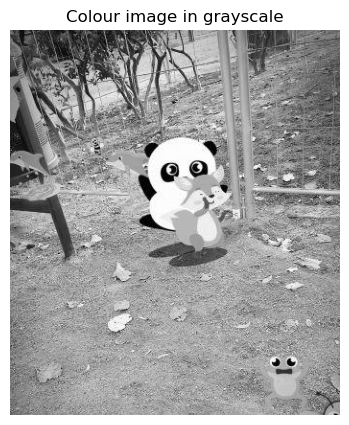

In [5]:
imc_gray = color.rgb2gray(imc)

plt.figure(figsize=(5,5))
plt.imshow(imc_gray, cmap='gray')
plt.axis('off')
plt.title('Colour image in grayscale')


2. (2 points) Add 10\% salt and pepper noise to the image.

/tmp/ipykernel_373733/1350718190.py:3: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  imc_gray_noisy = random_noise(imc_gray, seed = 1, mode = 's&p', amount = 0.1)


Text(0.5, 1.0, 'Grayscale image with randomly \n sampled 10% salt and pepper noise')

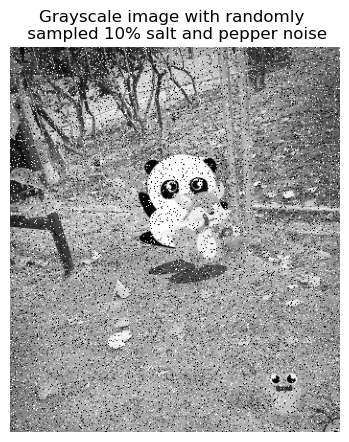

In [6]:
from skimage.util import random_noise

imc_gray_noisy = random_noise(imc_gray, seed = 1, mode = 's&p', amount = 0.1)

plt.figure(figsize=(5,5))
plt.imshow(imc_gray_noisy, cmap = 'gray')
plt.axis('off')
plt.title('Grayscale image with randomly \n sampled 10% salt and pepper noise')

3. (10 points) Compare the time taken to run Gaussian blur operations in the spatial domain vs the frequency domain the following 7 values of `sigma` - 1,2,4,8,16,32 and 64. Plot the time taken vs sigma for both spatial and frequency domain in the same plot. You can use the "time" module in Python.

/tmp/ipykernel_373733/1053733741.py:15: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gauss_kernel = np.outer(signal.gaussian(im_freq.shape[0], s), signal.gaussian(im_freq.shape[1], s))


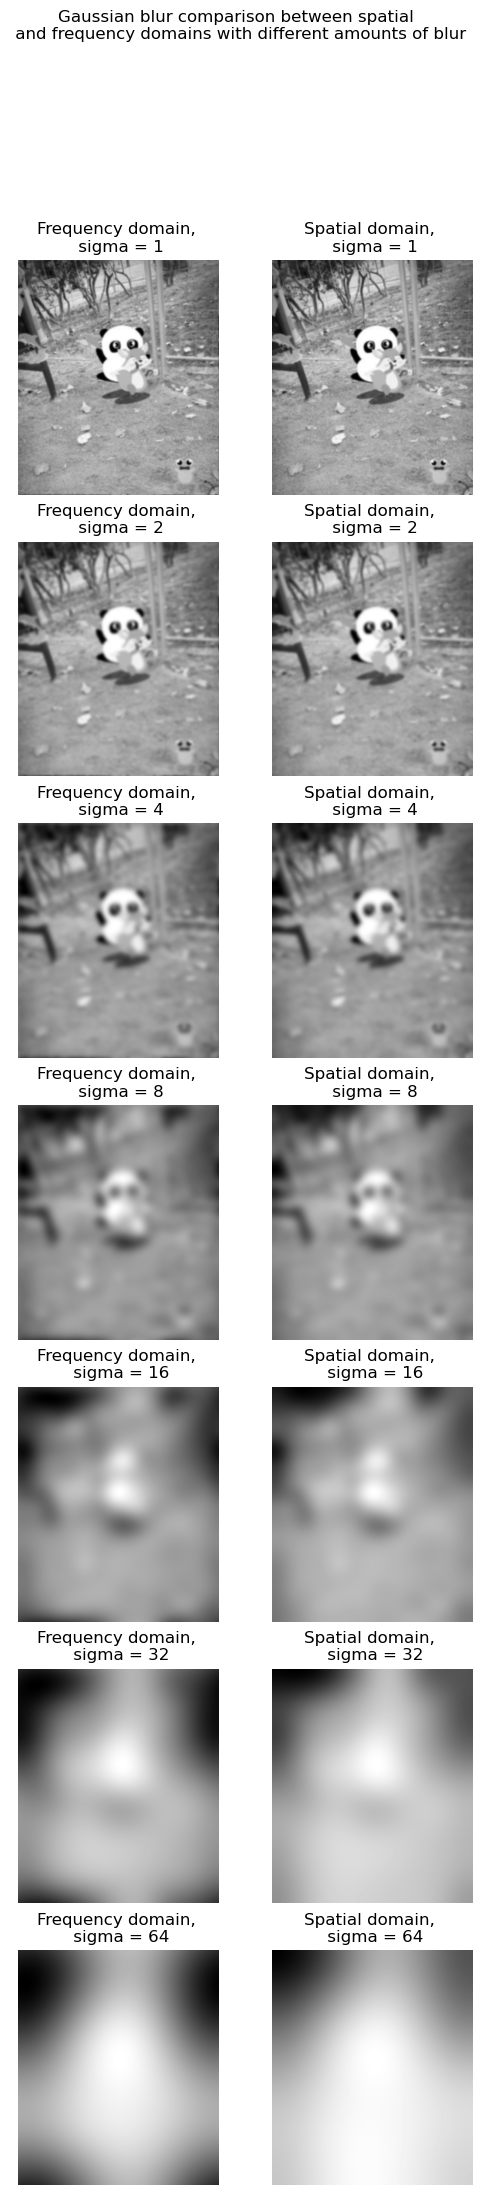

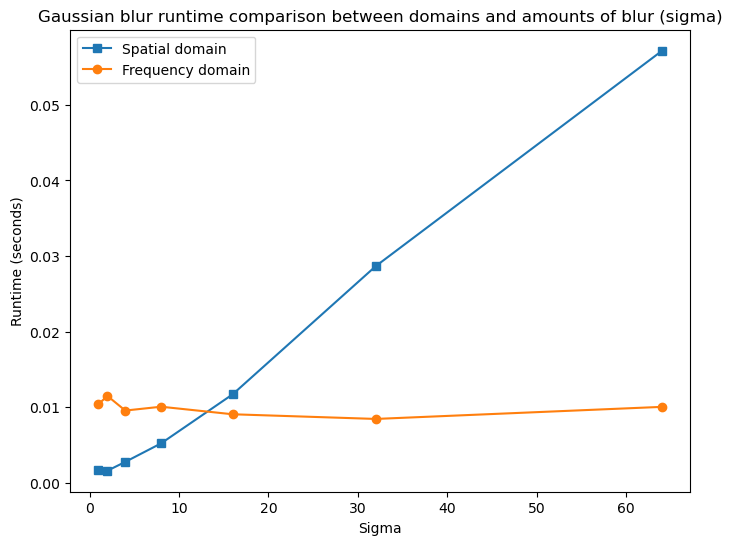

In [7]:
from scipy import signal
from scipy import ndimage
from scipy.fftpack import fftn, ifftn, fftshift, ifftshift
import numpy as np
import time 

# Function for perfroming gaussian blur operation in the spatial domain 
def spatial_gaussian_blur(s):
    return ndimage.gaussian_filter(imc_gray, sigma=s)

# Function for perfroming gaussian blur operation in the frequency domain
def freq_gaussian_blur(s):
    im_freq = fftn(imc_gray)
    # create kernel of image size and sigma = x
    gauss_kernel = np.outer(signal.gaussian(im_freq.shape[0], s), signal.gaussian(im_freq.shape[1], s))
    # convert it to frequency domain    
    freq_kernel = fftn(ifftshift(gauss_kernel))
    # Gaussian blur operation 
    im_freqconvolved = im_freq*freq_kernel
    return ifftn(im_freqconvolved).real 

# Collect runtimes
runtimes_s = []
runtimes_f = []
sigmas = [1, 2, 4, 8, 16, 32, 64]

plt.figure(figsize=(6, 25))
counter = 1

for i in sigmas:
    
    # measure runtime for spatial domain gaussian blur operation
    start_time_s = time.time()
    spatial_gaussian_blur(i)
    end_time_s = time.time()
    runtime_s = end_time_s - start_time_s
    runtimes_s.append(runtime_s)

    plt.subplot(7, 2, counter)
    plt.imshow(freq_gaussian_blur(i), cmap='gray')
    plt.axis('off')
    plt.title('Frequency domain, \n sigma = {}'.format(i))

    # measure runtime for frequency domain gaussian blur operation
    start_time_f = time.time()
    freq_gaussian_blur(i)
    end_time_f = time.time()
    runtime_f = end_time_f - start_time_f
    runtimes_f.append(runtime_f)

    plt.subplot(7, 2, counter+1)
    plt.imshow(spatial_gaussian_blur(i), cmap='gray')
    plt.axis('off')
    plt.title('Spatial domain, \n sigma = {}'.format(i))

    counter += 2

plt.suptitle('Gaussian blur comparison between spatial \n and frequency domains with different amounts of blur')

# make a line plot of runtimes
plt.figure(figsize=(8, 6))
plt.plot(sigmas, runtimes_s, marker = 's', label='Spatial domain')
plt.plot(sigmas, runtimes_f, marker = 'o', label='Frequency domain')
plt.xlabel('Sigma')
plt.ylabel('Runtime (seconds)')
plt.title('Gaussian blur runtime comparison between domains and amounts of blur (sigma)')
plt.legend()
plt.show()


4. (3 points) Briefly comment on your plot. When `sigma` is larger, the kernel is larger. Which domain is perfered for for larger kernels? 

The runtime results show that the gaussian blur operation's runtime complexity with respect to its input parameter sigma, is O(n), linear, in the spatial domain, and O(1), constant, in in the frequency domain. <br>

Therefore, for larger sigma (sigma > 15, in this case) the operation is performed faster in the frequency domain. <br> 
Thus, for larger amounts of blurring the frequency domain is prefered over the spatial domain to perform gaussian blur operation on grayscale images.